## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

Hola, ya es el último proyecto, has avanzado y aprendido mucho hasta acá. ¡Muchas felicidades!

Es hora de poner en práctica todo lo que hemos aprendido a lo largo de nuestra travesía.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que lo concluyas de manera sobresaliente.

¡Éxito!

# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


# Proyecto

1. Selecciona uno de los siguientes *datasets*:
  - Imágenes de rayos X de pecho para detectar neumonía: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps
  - Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners
  - Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo de *Machine Learning*, procesamiento de lenguaje natural o red neuronal que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti.

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**

In [1]:
!pip install opendatasets

In [2]:
!pip install kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"omeeeee902","key":"5311995130a7d2c375c90601c67b74ea"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets list

ref                                                               title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/global-youtube-statistics-2023                   Global YouTube Statistics 2023                      60KB  2023-07-28 15:36:38           9468        317  1.0              
arjunajn/netflix-watch-log                                        Netflix Watch Log                                  295KB  2023-08-22 08:23:45            629         29  1.0              
vincentcornlius/sales-orders                                      sales orders                                         5MB  2023-08-24 14:04:11            732         23  0.8235294        
kapturovalexander/gold-and-silver-prices-2013-2023     

In [6]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:32<00:00, 99.2MB/s]
100% 2.29G/2.29G [00:32<00:00, 76.9MB/s]


In [7]:
!unzip -q /content/chest-xray-pneumonia.zip

In [8]:
#Librerpias a utilizar durante el proyecto
import numpy as np
import os
import cv2
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from keras import layers
from keras.regularizers import l2
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.preprocessing.image import  load_img, ImageDataGenerator
import warnings
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

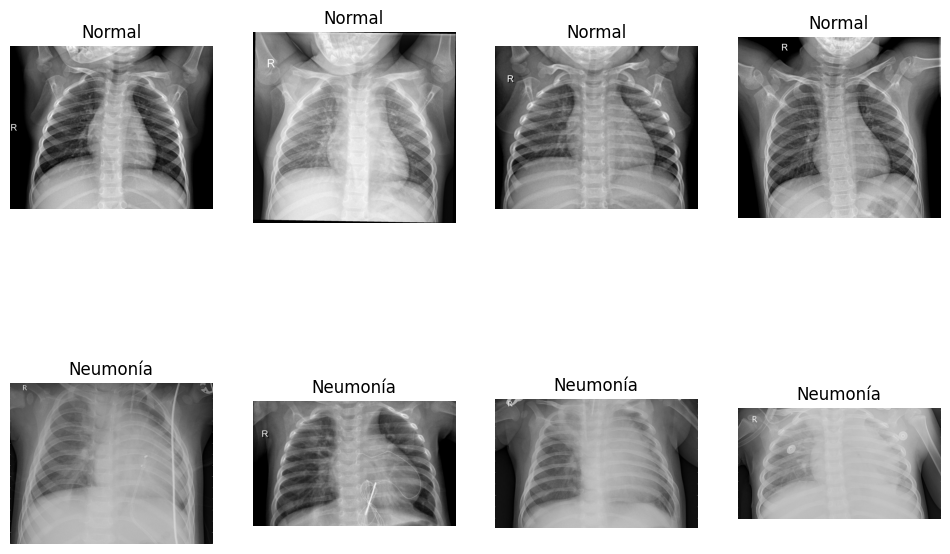

In [9]:
#obtenemos nuestros datos y definimos 2 conjuntos de train y test
train_normal_dir = '/content/chest_xray/train/NORMAL'
train_neumonia_dir = '/content/chest_xray/train/PNEUMONIA'

#graficamos imágenes para hacer exploración de datos
imagenes_normales = os.listdir(train_normal_dir)
plt.figure(figsize=(12,8))
for i, img_name in enumerate(imagenes_normales[:4]):
  img_path = os.path.join(train_normal_dir, img_name)
  imagen = cv2.imread(img_path)
  plt.subplot(2, 4, i+1)
  plt.imshow(imagen)
  plt.title("Normal")
  plt.axis('off')


imagenes_neumonia = os.listdir(train_neumonia_dir)
for i, img_name in enumerate(imagenes_neumonia[:4]):
  img_path = os.path.join(train_neumonia_dir, img_name)
  imagen = cv2.imread(img_path)
  plt.subplot(2, 4, i+5)
  plt.imshow(imagen)
  plt.title("Neumonía")
  plt.axis('off')

In [10]:
#Genermos nuestros generadores de datos a partir de las imagenes, y escalamos nuestros datos
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=.2)

#datos de train
train_generator = train_datagen.flow_from_directory('/content/chest_xray/train',
                                                    target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    subset="training")
#datos de validacion
validation_generator = train_datagen.flow_from_directory('/content/chest_xray/val',
                                                    target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    subset="validation")

Found 4173 images belonging to 2 classes.
Found 2 images belonging to 2 classes.


In [11]:
#Red neuronal
model = tf.keras.models.Sequential([
    #Primera convolución
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    #Segunda convolución
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    #Tercera convolución
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.15),
    layers.Dense(1, activation='sigmoid')
])

In [12]:
#Entrenamos nuestros datos con la red creada
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(
      train_generator,
      epochs=5,
      verbose=1,
      validation_data = validation_generator)

Epoch 1/5
131/131 [==============================] - 148s 1s/step - loss: 0.2848 - accuracy: 0.8768 - val_loss: 0.7382 - val_accuracy: 0.5000
Epoch 2/5
131/131 [==============================] - 150s 1s/step - loss: 0.1152 - accuracy: 0.9602 - val_loss: 0.1379 - val_accuracy: 1.0000
Epoch 3/5
131/131 [==============================] - 143s 1s/step - loss: 0.0892 - accuracy: 0.9686 - val_loss: 0.0527 - val_accuracy: 1.0000
Epoch 4/5
131/131 [==============================] - 141s 1s/step - loss: 0.0687 - accuracy: 0.9748 - val_loss: 0.0268 - val_accuracy: 1.0000
Epoch 5/5
131/131 [==============================] - 143s 1s/step - loss: 0.0547 - accuracy: 0.9803 - val_loss: 0.2577 - val_accuracy: 1.0000


In [15]:
#Evaluamos el modelo
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory('/content/chest_xray/test',
                                                    target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode='binary')

perdida, accuracy = model.evaluate(test_generator)
print(perdida, accuracy)

Found 624 images belonging to 2 classes.
20/20 [==============================] - 10s 483ms/step - loss: 1.4768 - accuracy: 0.7324
1.4768264293670654 0.7323718070983887


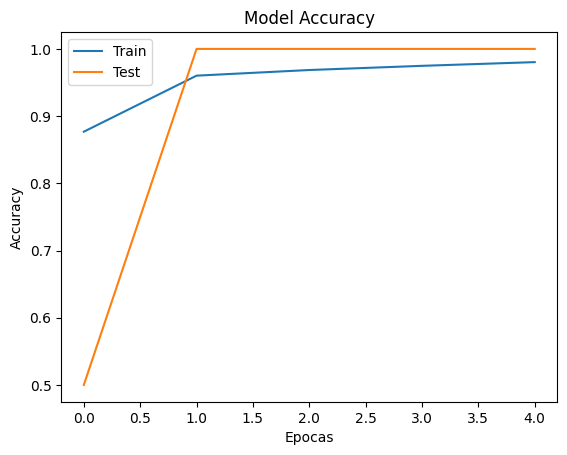

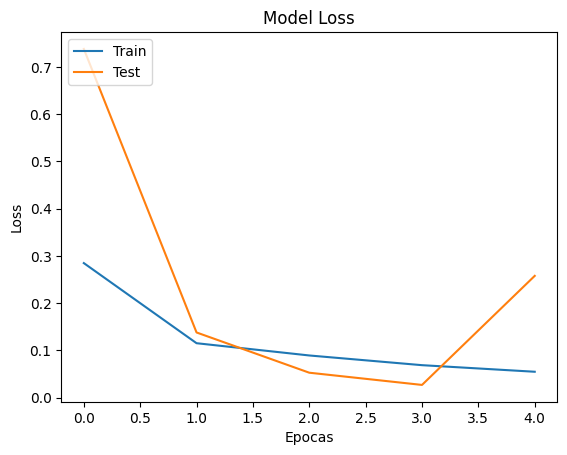

In [16]:
#Gráficamos el rendimineto de nuestor modelo
def plot_metrics(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epocas')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epocas')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

plot_metrics(history)

In [ ]:
pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 2.0 MB/s eta 0:00:00


In [ ]:
#Generamos un ajuste de hiperparámetros para identificar los mejores para utilizar

import tensorflow as tf
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = tf.keras.models.Sequential()
    model.add(layers.Conv2D(hp.Int('conv1_units', min_value=16, max_value=64, step=16), (3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(layers.MaxPooling2D(2, 2))
    model.add(layers.Conv2D(hp.Int('conv2_units', min_value=32, max_value=128, step=32), (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(2, 2))
    model.add(layers.Conv2D(hp.Int('conv3_units', min_value=64, max_value=256, step=64), (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(2, 2))
    model.add(layers.Flatten())
    model.add(layers.Dense(hp.Int('dense_units', min_value=256, max_value=1024, step=256), activation='relu'))
    model.add(layers.Dropout(hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    directory='tuning_directory',
    project_name='hyperparameter_tuning'
)

tuner.search(train_generator, validation_data=validation_generator, epochs=10)

best_model = tuner.get_best_models(num_models=1)[0]

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('/content/chest_xray/test',
                                                  target_size=(150, 150),
                                                  batch_size=32,
                                                  class_mode='binary')

test_loss, test_acc = best_model.evaluate(test_generator)
print('Test accuracy of the best model:', test_acc)

Trial 10 Complete [01h 41m 02s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 09h 20m 36s
Found 624 images belonging to 2 classes.
20/20 [==============================] - 10s 465ms/step - loss: 0.6920 - accuracy: 0.7628
Test accuracy of the best model: 0.7628205418586731


In [ ]:
#funcion para construir un modelo con los mejores hiperparámetros
def build_best_model():
    #Mejores parámetros según el tuning
    best_conv1_units = 16
    best_conv2_units = 32
    best_conv3_units = 64
    best_dense_units = 256
    best_dropout_rate = 0.3

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(best_conv1_units, (3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(tf.keras.layers.MaxPooling2D(2, 2))
    model.add(tf.keras.layers.Conv2D(best_conv2_units, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(2, 2))
    model.add(tf.keras.layers.Conv2D(best_conv3_units, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(2, 2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(best_dense_units, activation='relu'))
    model.add(tf.keras.layers.Dropout(best_dropout_rate))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

#Crear y entrenar modelos individuales
num_models = 5  #cantidad de modelos
bagged_models = []

for _ in range(num_models):
    model = build_best_model()
    model.fit(train_generator, epochs=3, validation_data=validation_generator)
    bagged_models.append(model)

#Calcular las predicciones promediadas para el ensamblado
ensemble_predictions = np.mean([model.predict(test_generator) for model in bagged_models], axis=0)
ensemble_predictions = (ensemble_predictions > 0.5).astype(int)

accuracy = np.mean(ensemble_predictions == test_generator.classes)
print("Accuracy of Bagging Ensemble: {:.2f}%".format(accuracy * 100))


Epoch 1/3
131/131 [==============================] - 137s 1s/step - loss: 0.3497 - accuracy: 0.8545 - val_loss: 1.2350 - val_accuracy: 0.5000
Epoch 2/3
131/131 [==============================] - 134s 1s/step - loss: 0.1305 - accuracy: 0.9504 - val_loss: 0.9954 - val_accuracy: 0.5000
Epoch 3/3
131/131 [==============================] - 133s 1s/step - loss: 0.0976 - accuracy: 0.9641 - val_loss: 0.3798 - val_accuracy: 0.5000
Epoch 1/3
131/131 [==============================] - 132s 995ms/step - loss: 0.3114 - accuracy: 0.8766 - val_loss: 0.1838 - val_accuracy: 1.0000
Epoch 2/3
106/131 [=======================>......] - ETA: 25s - loss: 0.1154 - accuracy: 0.9567